## Data Pre-Processing

### Data cleaning

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [11]:
# Loading data form file
data = pd.read_csv("../dataset/trains.csv")
data.head()

,train_ID,origin,arrival,departure_time,arrival_time,delay,train_type,detection_date
0,13,M N CADORNA,LAVENO,06:39,08:23,0,regionale,2023-08-13
1,20,LAVENO,M N CADORNA,06:38,08:09,0,regionale,2023-08-13
2,25,M N CADORNA,LAVENO,08:52,10:23,0,regionale,2023-08-13
3,26,LAVENO,M N CADORNA,07:38,09:09,0,regionale,2023-08-13
4,29,M N CADORNA,LAVENO,09:39,11:23,0,regionale,2023-08-13


In [12]:
# Remove None row from dataset
df_cleaned = data[data['departure_time'] != "None"]
df_cleaned = data[data['arrival_time'] != "None"]

In [13]:
# Transform string time value from HH:MM in minutes (int)
def time_to_minutes(time):
    hour, minutes = time.split(":")
    return int(hour)*60 + int(minutes)

df_cleaned['departure_time'] = df_cleaned['departure_time'].astype(str).apply(time_to_minutes)
df_cleaned['arrival_time'] = df_cleaned['arrival_time'].astype(str).apply(time_to_minutes)


In [14]:
df_cleaned['origin'] = df_cleaned['origin'].str.replace(' ', '_')
df_cleaned['arrival'] = df_cleaned['arrival'].str.replace(' ', '_')

# Binary normalization on 'train_type'
df_cleaned['train_type'] = df_cleaned['train_type'].map({'regionale': 1, 'nazionale': 0})

df_cleaned.head()

,train_ID,origin,arrival,departure_time,arrival_time,delay,train_type,detection_date
0,13,M_N_CADORNA,LAVENO,399,503,0,1,2023-08-13
1,20,LAVENO,M_N_CADORNA,398,489,0,1,2023-08-13
2,25,M_N_CADORNA,LAVENO,532,623,0,1,2023-08-13
3,26,LAVENO,M_N_CADORNA,458,549,0,1,2023-08-13
4,29,M_N_CADORNA,LAVENO,579,683,0,1,2023-08-13


In [15]:
df_cleaned.to_csv("../dataset/trains_refined.csv", index=False)

### Data visualization

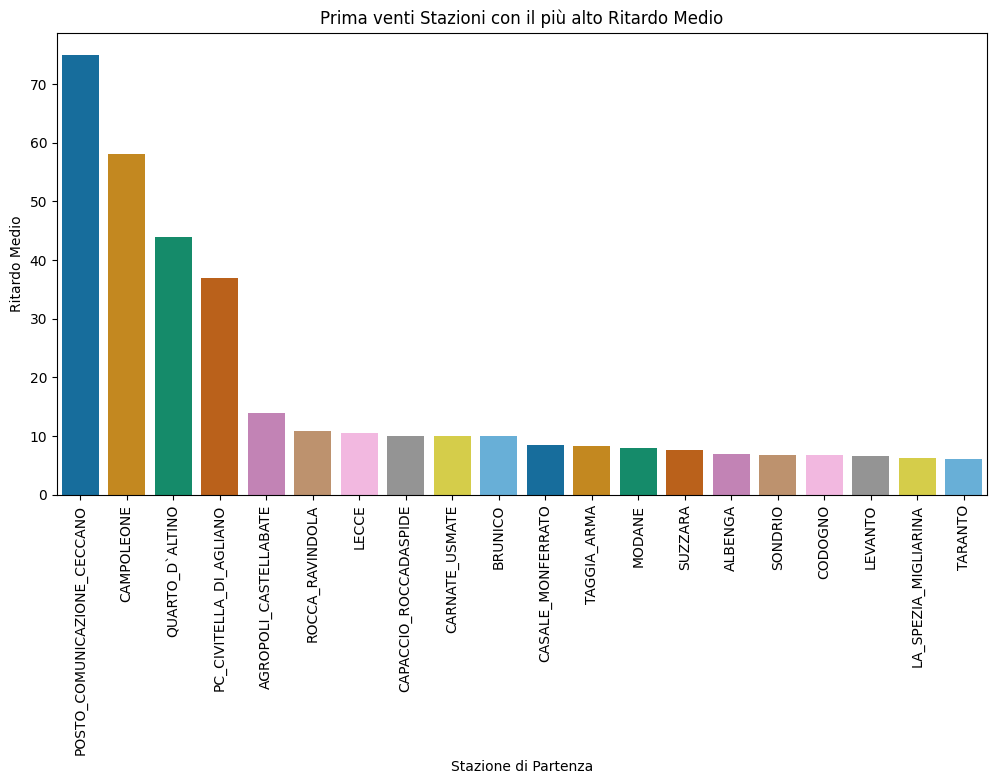

In [16]:
# Average delays for each departure station
avg_delay_by_origin = df_cleaned.groupby('origin')['delay'].mean().reset_index()

# Sort stations by average delay in descending order
sorted_stations = avg_delay_by_origin.sort_values(by='delay', ascending=False)

# Select first twenty stations with highest delay rate
top_20_stations = sorted_stations.head(20)

# Visualize stations
plt.figure(figsize=(12, 6))
sns.barplot(x='origin', y='delay', data=top_20_stations, palette="colorblind")
plt.xlabel('Stazione di Partenza')
plt.ylabel('Ritardo Medio')
plt.title('Prima venti Stazioni con il più alto Ritardo Medio')
plt.xticks(rotation=90)
plt.show()

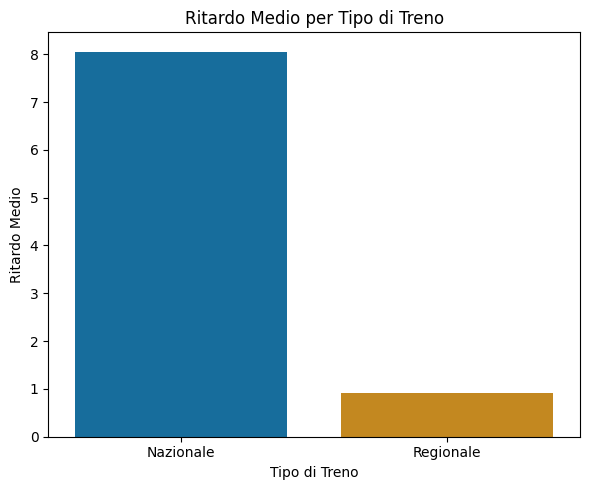

In [17]:
# Average delays for each train type
mean_delay_by_train_type = df_cleaned.groupby('train_type')['delay'].mean().reset_index()

# Visualize train type
plt.figure(figsize=(6, 5))
sns.barplot(x='train_type', y='delay', data=mean_delay_by_train_type, palette="colorblind")
plt.xlabel('Tipo di Treno')
plt.ylabel('Ritardo Medio')
plt.title('Ritardo Medio per Tipo di Treno')
plt.tight_layout()
plt.xticks([0, 1], ['Nazionale', 'Regionale'])
plt.show()